In [30]:
from PIL import Image
import requests
import matplotlib.pyplot as plt 

import numpy as np
from torch import nn

from transformers import AutoProcessor

In [5]:
url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [22]:
px

0.01

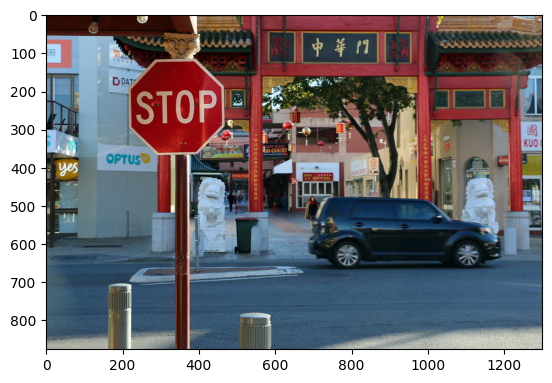

In [24]:
#px = 1/plt.rcParams['figure.dpi'] 
#plt.subplots(figsize=(336*px, 336*px))
plt.imshow(image)

In [13]:
model_name = "llava-hf/llava-1.5-7b-hf"
processor = AutoProcessor.from_pretrained(model_name)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [17]:
prompt = "USER: <image>\nDescribe the image. ASSISTANT:"
pixel_values = processor(images=image, text=prompt, return_tensors="pt")['pixel_values']
pixel_values.shape

torch.Size([1, 3, 336, 336])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..2.145897].


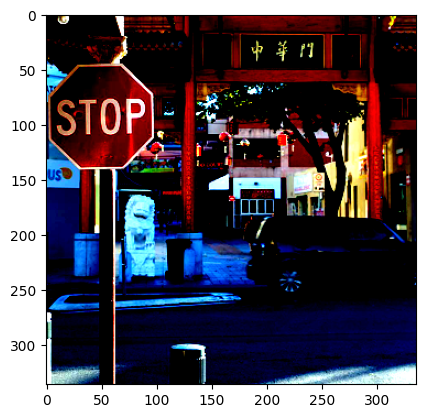

In [35]:
img = pixel_values[0].permute(1, 2, 0)
plt.imshow(img)

In [18]:
in_channels = 3
out_channels = 1024
patch_size = 14

conv = nn.Conv2d(
    in_channels=in_channels,
    out_channels=out_channels,
    kernel_size=patch_size,
    stride=patch_size,
    bias=False,
)

In [20]:
conv(pixel_values).shape

torch.Size([1, 1024, 24, 24])